<img
src="http://www.imt-atlantique.fr/sites/default/files/logo_mt_0_0.png"
WIDTH=180 HEIGHT=180>

<CENTER>

<p><font size="5"> Cursus Recherche : Module Analogie </font></p>
<p><font size="5"> Representation Learning </font></p>
</br>
<p><font size="4"> [<span style="color:blue">Institut Mines Télécom</span>](https://www.mines-telecom.fr/en/)</p>

</CENTER>

----------------------------

Objectifs :
- Implémenter le pipeline : PCA + kmeans 
Varier le nombre de composantes 
tests sur Digits 

--> Notebook "propre", annoté et commenté pour le Mardi 14 Novembre. 

Méthodes : 

Deux domaines , trois datasets : 
 - Digits 
 - Olivetti Faces 
 - Haxby (données fMRI) 

Deux méthodes de Dimensionality Reduction 
Deux méthodes de Clustering 

Résultats : 

figures 


# <span style="color:##00B8DE"> Pipeline : from reduction to clustering</span>


**1)** With Digits


**2)** With Haxby

**3)** Comparaison avec le mode supervisé

Les courbes d'évaluation de performance de clustering pour PCA et ICA sont globalement croissantes en fonction du nombre de n_component, mais divergent assez rapidement (i.e. Elles perdent en régularité).
On s'aperçit aussi qu'en augmentant le nombre de clusters que le kmeans cherche, on a tendance à "lisser" les courbes de PCA/kmeans et d'ICA/kmeans.

**1)** With Digits

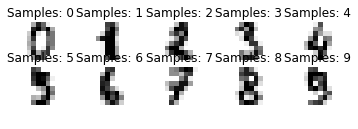

Clustering performance evaluation for ICA/kmeans on Digits: 
65.01 %


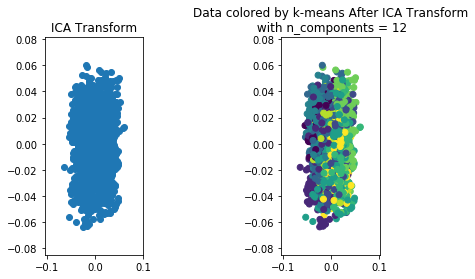

C:\Programs\Miniconda3\envs\DeepLearningPython\lib\site-packages\sklearn\decomposition\fastica_.py:118: UserWarning:

FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.



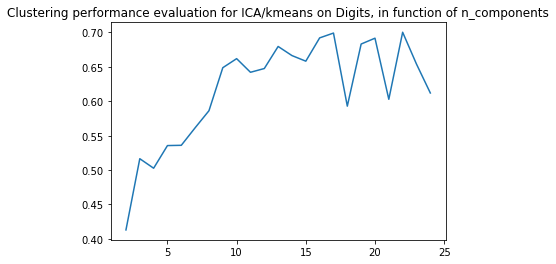

Clustering performance evaluation for PCA/Kmeans on Digits : 
65.15 %


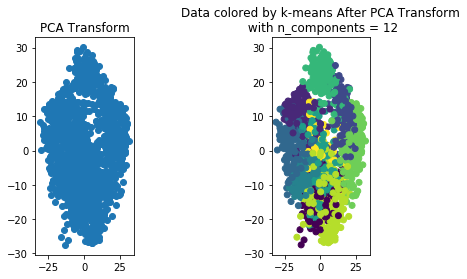

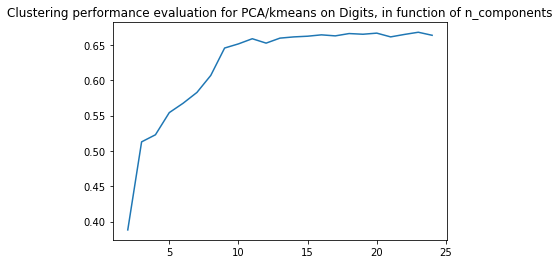

In [14]:
# We will Test PCA/ICA - KMeans on Digits

%matplotlib inline

from sklearn.cluster import KMeans
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

# The digits dataset
digits = datasets.load_digits()
images_and_labels = list(zip(digits.images, digits.target))
plt.figure()
for index, (image, label) in enumerate(images_and_labels[:10]):
    plt.subplot(5, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Samples: %i' % label)
plt.show()

#PCA
def Digits_PCA_kmeans(n):
    pca = PCA(n_components=n, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
    ImageDigitsPCA = pca.fit_transform(digits.images.reshape(1797,8*8))#This transformation is a compression of data

    #ClusterisationPCA:
    nbClust = 10
    kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
        verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(ImageDigitsPCA)
    labelsPCA = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob
    
    return labelsPCA, ImageDigitsPCA


#ICA
def Digits_ICA_kmeans(n):
    ica = FastICA(n_components=n, algorithm='parallel', whiten=True, fun='logcosh', fun_args=None, max_iter=200, tol=0.0001, w_init=None, random_state=None)
    ImageDigitsICA = ica.fit_transform(digits.images.reshape(1797,8*8))#This transformation is a compression of data
    
    #Clusterization ICA:
    nbClust = 10
    kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
       verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(ImageDigitsICA)
    labelsICA = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob
    
    return labelsICA, ImageDigitsICA

###  Part PLOT  ###

n = random.randint(2,19)

##Plot ICA

labelsICA, ImageDigitsICA = Digits_ICA_kmeans(n)

print("Clustering performance evaluation for ICA/kmeans on Digits: ")
print((10000*metrics.adjusted_rand_score(digits.target, labelsICA)//1)/100,'%') 

plt.subplot(131)
plt.title("ICA Transform")
plt.scatter(ImageDigitsICA[:,0],ImageDigitsICA[:,1])
plt.subplot(133)
plt.title("Data colored by k-means After ICA Transform\n with n_components = %i" % n)
plt.scatter(ImageDigitsICA[:,0],ImageDigitsICA[:,1],c=labelsICA)
plt.show()

N = 25
Perf = []
perf = 0
indX = [i for i in range(2,N)]
for m in range(2,N):
    labelsICA, ImageDigitsICA = Digits_ICA_kmeans(m)
    perf = metrics.adjusted_rand_score(digits.target, labelsICA)
    Perf.append(perf)

plt.figure()
plt.plot(indX, Perf)
plt.title("Clustering performance evaluation for ICA/kmeans on Digits, in function of n_components")
plt.show()

##Plot PCA

labelsPCA, ImageDigitsPCA = Digits_PCA_kmeans(n)

print("Clustering performance evaluation for PCA/Kmeans on Digits : ")
print((10000*metrics.adjusted_rand_score(digits.target, labelsPCA)//1)/100,'%')

plt.subplot(131)
plt.title("PCA Transform")
plt.scatter(ImageDigitsPCA[:,0],ImageDigitsPCA[:,1])
plt.subplot(133)
plt.title("Data colored by k-means After PCA Transform\n with n_components = %i" % n)
plt.scatter(ImageDigitsPCA[:,0],ImageDigitsPCA[:,1],c=labelsPCA)

plt.show()

Perfo = []
indx = [i for i in range(2,N)]
for m in range(2,N):
    labelsPCA, ImageDigitsPCA = Digits_PCA_kmeans(m)
    perf = metrics.adjusted_rand_score(digits.target,labelsPCA)
    Perfo.append(perf)

plt.figure()
plt.plot(indx, Perfo)
plt.title("Clustering performance evaluation for PCA/kmeans on Digits, in function of n_components")
plt.show()


La performance du clustering sur les Digits avec Pca/kmeans est croissante et plafonne à environ 66%, dès n_component = 14.
La performance du clustering sur les Digits avec Ica/kmeans est globalement croissante jusqu'à n_component = 20, où elle plafonne à 70%, et puis la méthode diverge !

**2)** With Haxby

C:\Programs\Miniconda3\envs\DeepLearningPython\lib\site-packages\nilearn\image\resampling.py:481: UserWarning: Casting data from int8 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))
C:\Programs\Miniconda3\envs\DeepLearningPython\lib\site-packages\scipy\ndimage\interpolation.py:462: UserWarning: The behaviour of affine_transform with a one-dimensional array supplied for the matrix parameter has changed in scipy 0.18.0.
  "The behaviour of affine_transform with a one-dimensional "


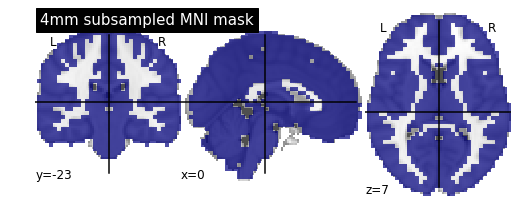

ValueError: shapes (2000,) and (20,2000) not aligned: 2000 (dim 0) != 20 (dim 0)

In [2]:
%matplotlib inline 

from nilearn.image import threshold_img
from nilearn.plotting import plot_roi
from nilearn.datasets import fetch_icbm152_brain_gm_mask
from nilearn.image import resample_img

import numpy as np
# Preparing mni mask at 4x4x4 

from matplotlib import pyplot as plt 

X= np.load("IAPS_data_500subjects_1vs5_4mm.npz")['X']
y= np.load("IAPS_data_500subjects_1vs5_4mm.npz")['y']

mni_mask = fetch_icbm152_brain_gm_mask()

target_affine_4mm = np.diag([4,4,4])

mni_mask_resampled = resample_img(mni_mask, target_affine_4mm)

# Values need to be thresholded 

from nilearn.image import threshold_img

mni_mask_resampled_thre = threshold_img(mni_mask_resampled,threshold=0.5)

plot_roi(mni_mask_resampled_thre,title='4mm subsampled MNI mask')
plt.show()

## BEST VALUES ##

from sklearn.feature_selection import SelectKBest

nbfeat = 2000 

featureselect = SelectKBest(k=nbfeat)

X_low = featureselect.fit_transform(X,y)

## Fit with non-supervised algorithm KMeans) ##

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

pca = PCA(n_components=20, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
statsPCA = pca.fit_transform(X_low)#This transformation is a compression of data

#Clusterization PCA - KMeans:
nbClust = 5
kmeans = KMeans(n_clusters=nbClust, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto',
   verbose=0, random_state=None, copy_x=True, n_jobs=1, algorithm='auto').fit(X_low)
labels = kmeans.labels_#.labels_ donne le numéro du cluster dans lequel se trouve chaque blob
for i in range(nbClust):
    cluster_center_i = pca.inverse_transform(kmeans.cluster_centers_[i])
# Reproject the coefficients on the initial space with 23000+ voxels 

    centeri_vox = featureselect.inverse_transform(cluster_center_i)

# and now reproject in brain space for visualization 

    cluster_image_i = mymasker.inverse_transform(centeri_vox)

    plot_stat_map(cluster_image_i,cut_coords=8,display_mode='z',title='Centroid %d' % i)

plt.show()


**3) Compararaison avec le mode supervisé**

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1 

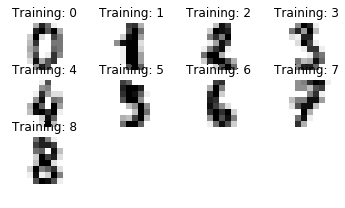

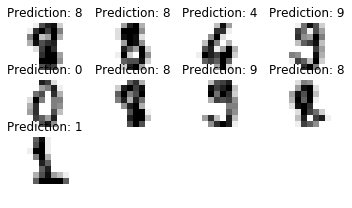

In [23]:
%matplotlib inline
# Standard scientific Python imports
import matplotlib.pyplot as plt
import numpy as np
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics

# The digits dataset
digits = datasets.load_digits()

# The data that we are interested in is made of 8x8 images of digits, let's
# have a look at the first 4 images, stored in the `images` attribute of the
# dataset.  If we were working from image files, we could load them using
# matplotlib.pyplot.imread.  Note that each image must have the same size. For these
# images, we know which digit they represent: it is given in the 'target' of
# the dataset.
images_and_labels = list(zip(digits.images, digits.target))
plt.figure()
for index, (image, label) in enumerate(images_and_labels[:9]):
    plt.subplot(4, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

n_samples = len(digits.images)
def Digits_SVM(digits):
    # To apply a classifier on this data, we need to flatten the image, to
    # turn the data in a (samples, feature) matrix:
    n_samples = len(digits.images)
    data = digits.images.reshape((n_samples, -1))

    # Create a classifier: a support vector classifier
    classifier = svm.SVC(gamma=0.001)

    #Le paramètre gamma est choisi manuellement, mais il est recommandé de le configurer avec la "validation croisée".
    #La validation croisée permet de choisir la meilleure méthode et ses paramètres.

    #Le classificateur SVC est un classificateur binaire à la base (i.e. il ne peut classifier qu'entre 2 classes 
    #à la fois), son principe de résolution du problème passe par la construction d'un hyperplan qui permet de séparer
    #les deux classes.

    #Nous appelons notre exemple estimateur classifier, car il est un classificateur.
    #Il doit maintenant être monté sur le modèle, c'est-à-dire qu'il doit apprendre à partir du modèle.
    #Cela se fait en adoptant notre ensemble d’entraînement à la méthode fit.
    #Nous utiliserons la moitié de notre base de données pour cet entraînement.


    # We learn the digits on the first half of the digits
    classifier.fit(data[:n_samples // 2], digits.target[:n_samples // 2])

    # Now predict the value of the digit on the second half:
    expected = digits.target[n_samples // 2:]
    predicted = classifier.predict(data[n_samples // 2:])
    print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))
    print("Confusion matrix:\n%s" % metrics.confusion_matrix(expected, predicted))
    return expected, predicted

expected, predicted = Digits_SVM(digits)


plt.figure()
images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:9]):
    plt.subplot(4, 4, index + 5)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

Comparaison entre les différentes méthodes pour le data set Digits :

Classification report for classifier SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        88
          1       0.99      0.97      0.98        91
          2       0.99      0.99      0.99        86
          3       0.98      0.87      0.92        91
          4       0.99      0.96      0.97        92
          5       0.95      0.97      0.96        91
          6       0.99      0.99      0.99        91
          7       0.96      0.99      0.97        89
          8       0.94      1.00      0.97        88
          9       0.93      0.98      0.95        92

avg / total       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1 

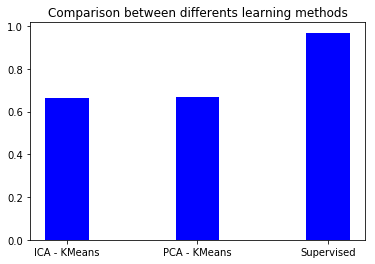

In [27]:
#Creation of bar graph : performance difference between supervised and non-supervised
%matplotlib inline

# Standard scientific Python imports

import matplotlib.pyplot as plt
import numpy as np

# Import datasets, classifiers and performance metrics

from sklearn import datasets, svm, metrics
import plotly.plotly as py

# The digits dataset
digits = datasets.load_digits()

# Learn about API authentication here: https://plot.ly/python/getting-started
# Find your api_key here: https://plot.ly/settings/api
labelsICA = Digits_ICA_kmeans(15)[0]
labelsPCA = Digits_PCA_kmeans(15)[0]
expected, predicted = Digits_SVM(digits)

y = [metrics.adjusted_rand_score(digits.target, labelsICA)\
     ,metrics.adjusted_rand_score(digits.target, labelsPCA)\
     ,metrics.accuracy_score(expected, predicted)]

x = ['ICA - KMeans', 'PCA - KMeans', 'Supervised']
width = 1/3
plt.figure()
plt.title("Comparison between differents learning methods")
plt.bar(x, y, width, color="blue")
plt.show()

